# 1. Preprocesamiento

In [ ]:
import pandas as pd

url_data =(r'pyg3_bank-additional-full.txt')
df = pd.read_csv(url_data, encoding='latin-1')
df.head()

,Edad,Trabajo,Estado Civil,educacion,default,hipoteca,préstamo,contacto,mes contacto,día contacto,...,campaña,diaspost,contactos previos,psalida,emp.var.ratio,idx.precio.cons,idx.conf.cons,euribor3m,nr.employed,S
0,56,Mucama,Casado,primaria,no,no,no,Teléfono,may,lun,...,1,999,0,inexistente,1.1,93.994,-36.4,4.857,5191.0,no
1,57,Servicios,Casado,secundaria,Desconocido,no,no,Teléfono,may,lun,...,1,999,0,inexistente,1.1,93.994,-36.4,4.857,5191.0,no
2,37,Servicios,Casado,secundaria,no,si,no,Teléfono,may,lun,...,1,999,0,inexistente,1.1,93.994,-36.4,4.857,5191.0,no
3,40,Administración,Casado,primaria,no,no,no,Teléfono,may,lun,...,1,999,0,inexistente,1.1,93.994,-36.4,4.857,5191.0,no
4,56,Servicios,Casado,secundaria,no,no,si,Teléfono,may,lun,...,1,999,0,inexistente,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
df.isnull().sum()

Edad                 0
Trabajo              0
Estado Civil         0
educacion            0
default              0
hipoteca             0
préstamo             0
contacto             0
mes contacto         0
día contacto         0
duration             0
campaña              0
diaspost             0
contactos previos    0
psalida              0
emp.var.ratio        0
idx.precio.cons      0
idx.conf.cons        0
euribor3m            0
nr.employed          0
S                    0
dtype: int64

In [ ]:
## Tamaño de los registros
df.shape

(41188, 21)

In [ ]:
#Eliminando duplicados
df = df.drop_duplicates()
df.shape

(41175, 21)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41175 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Edad               41175 non-null  int64  
 1   Trabajo            41175 non-null  object 
 2   Estado Civil       41175 non-null  object 
 3   educacion          41175 non-null  object 
 4   default            41175 non-null  object 
 5   hipoteca           41175 non-null  object 
 6   préstamo           41175 non-null  object 
 7   contacto           41175 non-null  object 
 8   mes contacto       41175 non-null  object 
 9   día contacto       41175 non-null  object 
 10  duration           41175 non-null  int64  
 11  campaña            41175 non-null  int64  
 12  diaspost           41175 non-null  int64  
 13  contactos previos  41175 non-null  int64  
 14  psalida            41175 non-null  object 
 15  emp.var.ratio      41175 non-null  float64
 16  idx.precio.cons    411

In [ ]:
df.describe()

,Edad,duration,campaña,diaspost,contactos previos,emp.var.ratio,idx.precio.cons,idx.conf.cons,euribor3m,nr.employed
count,41175.000000,41175.000000,41175.000000,41175.000000,41175.000000,41175.000000,41175.000000,41175.000000,41175.00000,41175.000000
mean,40.023752,258.317911,2.567917,962.463922,0.173018,0.081967,93.575736,-40.502725,3.62135,5167.036520
std,10.420802,259.308121,2.770341,186.939285,0.494970,1.570874,0.578836,4.627831,1.73442,72.251466
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.63400,4963.600000
25%,32.000000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.34400,5099.100000
50%,38.000000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.85700,5191.000000
75%,47.000000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.96100,5228.100000
max,98.000000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.04500,5228.100000


In [ ]:
# Vemos los pesos de la target
df['S'].value_counts()/df.shape[0]

no    0.887335
si    0.112665
Name: S, dtype: float64

In [ ]:
import numpy as np

# Función np.where(<condicion>, <valor cierto>, <valor falso>)
df['TARGET'] = np.where(df['S']=='si', 1, 0)
# Revisamos cómo queda la variable
df.TARGET.value_counts()

0    36536
1     4639
Name: TARGET, dtype: int64

In [ ]:
# Revisamos cómo queda la variable en porcentajes
df.TARGET.value_counts()/df.shape[0]

0    0.887335
1    0.112665
Name: TARGET, dtype: float64

In [ ]:
# Dropeamos la variable original
df = df.drop(columns = ['S'])

## Trabajare con columnas numericas en primer lugar

In [ ]:
df_numericas = df.select_dtypes('number').copy(deep=True)
df_numericas.head()

,Edad,duration,campaña,diaspost,contactos previos,emp.var.ratio,idx.precio.cons,idx.conf.cons,euribor3m,nr.employed,TARGET
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0


In [ ]:
# Revisemos valores nulos
df_numericas.isnull().sum()

Edad                 0
duration             0
campaña              0
diaspost             0
contactos previos    0
emp.var.ratio        0
idx.precio.cons      0
idx.conf.cons        0
euribor3m            0
nr.employed          0
TARGET               0
dtype: int64

In [ ]:
# Veamos estadísticos básicos
df_numericas.describe()

,Edad,duration,campaña,diaspost,contactos previos,emp.var.ratio,idx.precio.cons,idx.conf.cons,euribor3m,nr.employed,TARGET
count,41175.000000,41175.000000,41175.000000,41175.000000,41175.000000,41175.000000,41175.000000,41175.000000,41175.00000,41175.000000,41175.000000
mean,40.023752,258.317911,2.567917,962.463922,0.173018,0.081967,93.575736,-40.502725,3.62135,5167.036520,0.112665
std,10.420802,259.308121,2.770341,186.939285,0.494970,1.570874,0.578836,4.627831,1.73442,72.251466,0.316187
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.63400,4963.600000,0.000000
25%,32.000000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.34400,5099.100000,0.000000
50%,38.000000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.85700,5191.000000,0.000000
75%,47.000000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.96100,5228.100000,0.000000
max,98.000000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.04500,5228.100000,1.000000


In [ ]:
# y luego miremos al promedio por cada uno de los grupos de sobrevivientes:
df_numericas.groupby(['TARGET'])['duration'].max()

TARGET
0    4918
1    4199
Name: duration, dtype: int64

In [ ]:
df_numericas['diaspost'].value_counts()

999    39660
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
22         3
19         3
21         2
25         1
26         1
27         1
20         1
Name: diaspost, dtype: int64

In [ ]:
# Revisamos cómo queda la variable en porcentajes
df_numericas.diaspost.value_counts()/df.shape[0]

999    0.963206
3      0.010662
6      0.010006
4      0.002866
9      0.001554
2      0.001481
7      0.001457
12     0.001409
10     0.001263
5      0.001117
13     0.000874
11     0.000680
1      0.000631
15     0.000583
14     0.000486
8      0.000437
0      0.000364
16     0.000267
17     0.000194
18     0.000170
22     0.000073
19     0.000073
21     0.000049
25     0.000024
26     0.000024
27     0.000024
20     0.000024
Name: diaspost, dtype: float64

# *Para terminos predictivos, descartaremos el uso de la variable Duration, puesto que en la bibliografia indica que solo es referencial. Asimismo, descartaremos la variable diaspost, puesto que contiene mas del 96% de las variables y esto puede sesgar el modelo*

In [ ]:
df_numericas.drop(['diaspost', 'duration'], axis=1, inplace = True)
df_numericas.describe()

,Edad,campaña,contactos previos,emp.var.ratio,idx.precio.cons,idx.conf.cons,euribor3m,nr.employed,TARGET
count,41175.000000,41175.000000,41175.000000,41175.000000,41175.000000,41175.000000,41175.00000,41175.000000,41175.000000
mean,40.023752,2.567917,0.173018,0.081967,93.575736,-40.502725,3.62135,5167.036520,0.112665
std,10.420802,2.770341,0.494970,1.570874,0.578836,4.627831,1.73442,72.251466,0.316187
min,17.000000,1.000000,0.000000,-3.400000,92.201000,-50.800000,0.63400,4963.600000,0.000000
25%,32.000000,1.000000,0.000000,-1.800000,93.075000,-42.700000,1.34400,5099.100000,0.000000
50%,38.000000,2.000000,0.000000,1.100000,93.749000,-41.800000,4.85700,5191.000000,0.000000
75%,47.000000,3.000000,0.000000,1.400000,93.994000,-36.400000,4.96100,5228.100000,0.000000
max,98.000000,56.000000,7.000000,1.400000,94.767000,-26.900000,5.04500,5228.100000,1.000000


In [ ]:
df_numericas.head()

,Edad,campaña,contactos previos,emp.var.ratio,idx.precio.cons,idx.conf.cons,euribor3m,nr.employed,TARGET
0,56,1,0,1.1,93.994,-36.4,4.857,5191.0,0
1,57,1,0,1.1,93.994,-36.4,4.857,5191.0,0
2,37,1,0,1.1,93.994,-36.4,4.857,5191.0,0
3,40,1,0,1.1,93.994,-36.4,4.857,5191.0,0
4,56,1,0,1.1,93.994,-36.4,4.857,5191.0,0


## Escalamos las variables numericas

In [ ]:
# Escalemos los datos usando normalizacion Min-Max
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(df_numericas[['Edad', 'campaña', 'contactos previos', 'emp.var.ratio', 'idx.precio.cons', 'idx.conf.cons','euribor3m','nr.employed']])
df_numericas[['Edad', 'campaña', 'contactos previos', 'emp.var.ratio', 'idx.precio.cons', 'idx.conf.cons','euribor3m','nr.employed']] = scaler.transform(df_numericas[['Edad', 'campaña', 'contactos previos', 'emp.var.ratio', 'idx.precio.cons', 'idx.conf.cons','euribor3m','nr.employed']])

In [ ]:
# Revisamos si las variables se escalaron correctamente
df_numericas.describe()

,Edad,campaña,contactos previos,emp.var.ratio,idx.precio.cons,idx.conf.cons,euribor3m,nr.employed,TARGET
count,41175.000000,41175.000000,41175.000000,41175.000000,41175.000000,41175.000000,41175.000000,41175.000000,41175.000000
mean,0.284244,0.028508,0.024717,0.725410,0.535751,0.430848,0.677250,0.769136,0.112665
std,0.128652,0.050370,0.070710,0.327265,0.225579,0.193633,0.393203,0.273162,0.316187
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.185185,0.000000,0.000000,0.333333,0.340608,0.338912,0.160961,0.512287,0.000000
50%,0.259259,0.018182,0.000000,0.937500,0.603274,0.376569,0.957379,0.859735,0.000000
75%,0.370370,0.036364,0.000000,1.000000,0.698753,0.602510,0.980957,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# Analicemos correlaciones
# Vemos que fuera de la diagonal principal no hay correlaciones fuertes
df_numericas.corr() > 0.8

,Edad,campaña,contactos previos,emp.var.ratio,idx.precio.cons,idx.conf.cons,euribor3m,nr.employed,TARGET
Edad,True,False,False,False,False,False,False,False,False
campaña,False,True,False,False,False,False,False,False,False
contactos previos,False,False,True,False,False,False,False,False,False
emp.var.ratio,False,False,False,True,False,False,True,True,False
idx.precio.cons,False,False,False,False,True,False,False,False,False
idx.conf.cons,False,False,False,False,False,True,False,False,False
euribor3m,False,False,False,True,False,False,True,True,False
nr.employed,False,False,False,True,False,False,True,True,False
TARGET,False,False,False,False,False,False,False,False,True


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
import numpy as np
import pandas as pd 
import os
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix,r2_score
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
import warnings
from imblearn.over_sampling import SMOTE
warnings.filterwarnings('ignore')
import tensorflow as tf
from tensorflow import keras 
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam 
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

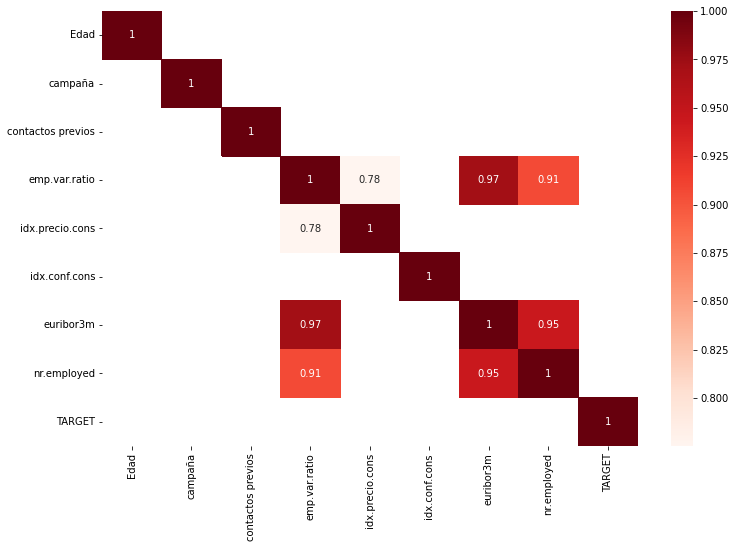

In [ ]:
corr = df_numericas.corr()
corr_greater_than_75 = corr[corr>=.75]
corr_greater_than_75
plt.figure(figsize=(12,8))
sns.heatmap(corr_greater_than_75, cmap="Reds", annot = True);

# Trabajamos con las categoricas

In [ ]:
df_cat = df.select_dtypes('object')
df_cat.head()

,Trabajo,Estado Civil,educacion,default,hipoteca,préstamo,contacto,mes contacto,día contacto,psalida
0,Mucama,Casado,primaria,no,no,no,Teléfono,may,lun,inexistente
1,Servicios,Casado,secundaria,Desconocido,no,no,Teléfono,may,lun,inexistente
2,Servicios,Casado,secundaria,no,si,no,Teléfono,may,lun,inexistente
3,Administración,Casado,primaria,no,no,no,Teléfono,may,lun,inexistente
4,Servicios,Casado,secundaria,no,no,si,Teléfono,may,lun,inexistente


In [ ]:
# Revisemos valores nulos
df_cat.isnull().sum()

Trabajo         0
Estado Civil    0
educacion       0
default         0
hipoteca        0
préstamo        0
contacto        0
mes contacto    0
día contacto    0
psalida         0
dtype: int64

In [ ]:
# Analicemos la variable Trabajo
df_cat['Trabajo'].value_counts()

Administración    10419
Obrero             9252
Técnico            6739
Servicios          3967
Gerente            2924
Retirado           1718
Empresario         1456
Auto-empleado      1421
Mucama             1060
Desempleado        1014
Estudiante          875
Desconocido         330
Name: Trabajo, dtype: int64

In [ ]:
df_cat['Trabajo'] = df_cat['Trabajo'].apply(lambda x: -1 if x=='Desconocido' or x=='Desempleado' else (15 if x=='Empresario' else (8 if x == 'Obrero' else ( 6 if x=='Técnico' or x=='Servicios' or  x=='Administración' or x=='Gerente' else (4 if x== 'Auto-empleado' or x=='Estudiante' else (2 if x=='Mucama' or x=='Retirado' else None) )))))

In [ ]:
# Analicemos la variable Trabajo ahora
df_cat['Trabajo'].value_counts()

 6     24049
 8      9252
 2      2778
 4      2296
 15     1456
-1      1344
Name: Trabajo, dtype: int64

In [ ]:
# Analicemos la variable Estado Civil
df_cat['Estado Civil'].value_counts()

Casado         24920
Soltero        11564
Divorciado      4611
Desconocido       80
Name: Estado Civil, dtype: int64

In [ ]:
# Revisamos cómo queda la variable en porcentajes
df_cat['Estado Civil'].value_counts()/df_cat.shape[0]

Casado         0.605222
Soltero        0.280850
Divorciado     0.111985
Desconocido    0.001943
Name: Estado Civil, dtype: float64

In [ ]:
# Analicemos la variable Educacion
df_cat['educacion'].value_counts()

graduado          12164
secundaria         9512
primaria           6466
secundaria.inc     6045
técnico            5240
desconocido        1730
analfabeto           18
Name: educacion, dtype: int64

In [ ]:
df_cat['educacion'] = df_cat['educacion'].apply(lambda x: -1 if x=='desconocido' or x=='analfabeto' else (15 if x=='graduado' else (8 if x == 'técnico' else ( 6 if x=='secundaria' or x=='primaria' or  x=='secundaria.inc'  else None))))

In [ ]:
# Analicemos la variable Educacion
df_cat['educacion'].value_counts()

 6     22023
 15    12164
 8      5240
-1      1748
Name: educacion, dtype: int64

In [ ]:
# Analicemos la variable Default
df_cat['default'].value_counts()

no             32576
Desconocido     8596
si                 3
Name: default, dtype: int64

In [ ]:
df_cat['default']=df_cat['default'].apply(lambda x: 0 if x=='no' else (1 if x=='si' else -1))

In [ ]:
# Analicemos la variable Default
df_cat['default'].value_counts()

 0    32576
-1     8596
 1        3
Name: default, dtype: int64

In [ ]:
# Analicemos la variable Hipoteca
df_cat['hipoteca'].value_counts()

si         21570
no         18615
unknown      990
Name: hipoteca, dtype: int64

In [ ]:
df_cat['hipoteca']=df_cat['hipoteca'].apply(lambda x : 0 if x=='no' else (1 if x=='si' else -1))

In [ ]:
# Analicemos la variable Hipoteca
df_cat['hipoteca'].value_counts()

 1    21570
 0    18615
-1      990
Name: hipoteca, dtype: int64

In [ ]:
# Analicemos la variable Prestamo
df_cat['préstamo'].value_counts()

no         33937
si          6248
unknown      990
Name: préstamo, dtype: int64

In [ ]:
df_cat['préstamo'] = df_cat['préstamo'].apply(lambda x: 0 if x=='no' else (1 if x=='si' else -1))

In [ ]:
# Analicemos la variable Prestamo
df_cat['préstamo'].value_counts()

 0    33937
 1     6248
-1      990
Name: préstamo, dtype: int64

In [ ]:
# Analicemos la variable Contaco
df_cat['contacto'].value_counts()

celular     26134
Teléfono    15041
Name: contacto, dtype: int64

In [ ]:
# Analicemos la variable mes Contaco
df_cat['mes contacto'].value_counts()

may    13766
jul     7169
ago     6176
jun     5318
nov     4100
abr     2631
oct      717
sep      570
mar      546
dic      182
Name: mes contacto, dtype: int64

In [ ]:
# Analicemos la variable dia Contaco
df_cat['día contacto'].value_counts()

jue    8618
lun    8512
mie    8133
mar    8086
vie    7826
Name: día contacto, dtype: int64

In [ ]:
# Analicemos la variable dia Contaco
df_cat['psalida'].value_counts()

inexistente    35550
fracaso         4252
exito           1373
Name: psalida, dtype: int64

In [ ]:
df_cat['psalida'] = df_cat['psalida'].apply(lambda x: 0 if x=='fracaso' else (1 if x=='exito' else -1))

In [ ]:
# Analicemos la variable dia Contaco
df_cat['psalida'].value_counts()

-1    35550
 0     4252
 1     1373
Name: psalida, dtype: int64

In [ ]:
df_cat.head()

,Trabajo,Estado Civil,educacion,default,hipoteca,préstamo,contacto,mes contacto,día contacto,psalida
0,2,Casado,6,0,0,0,Teléfono,may,lun,-1
1,6,Casado,6,-1,0,0,Teléfono,may,lun,-1
2,6,Casado,6,0,1,0,Teléfono,may,lun,-1
3,6,Casado,6,0,0,0,Teléfono,may,lun,-1
4,6,Casado,6,0,0,1,Teléfono,may,lun,-1


## Por conveniencia eliminamos los datos temporales como dia, mes y el contacto que se hizo con el usuario( sea por celular o telefono)

In [ ]:
df_cat.drop(['contacto', 'mes contacto', 'día contacto'], axis=1, inplace = True)

In [ ]:
df_cat.head()

,Trabajo,Estado Civil,educacion,default,hipoteca,préstamo,psalida
0,2,Casado,6,0,0,0,-1
1,6,Casado,6,-1,0,0,-1
2,6,Casado,6,0,1,0,-1
3,6,Casado,6,0,0,0,-1
4,6,Casado,6,0,0,1,-1


### Dumizando las variables categoricas

In [ ]:
# Notamos que todas las variables son de pocos valores.
# Por ello, podemos binarizarlas usando dummies (One-hot encoding)
# Adicionalmente, podemos usar el truco de eliminar uno de los valores, pues está implícito
df_cat = pd.get_dummies(df_cat, drop_first = True)
df_cat.head()

,Trabajo,educacion,default,hipoteca,préstamo,psalida,Estado Civil_Desconocido,Estado Civil_Divorciado,Estado Civil_Soltero
0,2,6,0,0,0,-1,0,0,0
1,6,6,-1,0,0,-1,0,0,0
2,6,6,0,1,0,-1,0,0,0
3,6,6,0,0,0,-1,0,0,0
4,6,6,0,0,1,-1,0,0,0


## Unimos los dataframes


In [ ]:
df_final = df_numericas.merge(df_cat, how = 'left', left_index = True, right_index = True)
df_final.head()

,Edad,campaña,contactos previos,emp.var.ratio,idx.precio.cons,idx.conf.cons,euribor3m,nr.employed,TARGET,Trabajo,educacion,default,hipoteca,préstamo,psalida,Estado Civil_Desconocido,Estado Civil_Divorciado,Estado Civil_Soltero
0,0.481481,0.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,0,2,6,0,0,0,-1,0,0,0
1,0.493827,0.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,0,6,6,-1,0,0,-1,0,0,0
2,0.246914,0.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,0,6,6,0,1,0,-1,0,0,0
3,0.283951,0.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,0,6,6,0,0,0,-1,0,0,0
4,0.481481,0.0,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,0,6,6,0,0,1,-1,0,0,0


In [ ]:
from sklearn.model_selection import train_test_split

X = df_final.reset_index().drop(columns = ['TARGET'])
y = df_final.reset_index()['TARGET']

# Nota: random_state = numero permite que ante diferentes ejecuciones se obtenga el mismo resultado (reproducibilidad)
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size = 0.2, random_state = 30)

In [ ]:
from collections import Counter
counter = Counter(y)
print(counter)

Counter({0: 36536, 1: 4639})


In [ ]:
# transform the dataset
oversample = SMOTE()
X2, y2 = oversample.fit_resample(X, y)

In [ ]:
# summarize the new class distribution
counter = Counter(y2)
print(counter)

Counter({0: 36536, 1: 36536})


In [ ]:
X2.shape

(73072, 18)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size = 0.2, random_state = 30)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)

# Notar que el scaler se fitea solo sobre el set de entrenamiento
X_train_sc = pd.DataFrame(scaler.transform(X_train), columns = X_train.columns)
X_val_sc = pd.DataFrame(scaler.transform(X_val), columns = X_val.columns)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

# Instanciamos los clasificadores
lr = LogisticRegression()
dt = DecisionTreeClassifier()
nb = GaussianNB()

# Entrenamos los clasificadores con la data de entrenamiento
lr.fit(X_train_sc, y_train)
dt.fit(X_train_sc, y_train)
nb.fit(X_train_sc, y_train)

GaussianNB()

In [ ]:
from sklearn.metrics import roc_auc_score

print(f'AUC - Naive Bayes {roc_auc_score(y_val, nb.predict_proba(X_val_sc)[:,1]):.4f}')
print(f'AUC - Decision Tree: {roc_auc_score(y_val, dt.predict_proba(X_val_sc)[:,1]):.4f}')
print(f'AUC - Logistic Regression: {roc_auc_score(y_val, lr.predict_proba(X_val_sc)[:,1]):.4f}')

AUC - Naive Bayes 0.7777
AUC - Decision Tree: 0.6253
AUC - Logistic Regression: 0.7795


In [ ]:
from sklearn.metrics import accuracy_score

print(f'Accuracy - Naive Bayes {accuracy_score(y_val, nb.predict(X_val_sc)):.4f}')
print(f'Accuracy - Decision Tree: {accuracy_score(y_val, dt.predict(X_val_sc)):.4f}')
print(f'Accuracy - Logistic Regression: {accuracy_score(y_val, lr.predict(X_val_sc)):.4f}')

Accuracy - Naive Bayes 0.8012
Accuracy - Decision Tree: 0.8427
Accuracy - Logistic Regression: 0.9009


In [ ]:
def print_confusion_matrix(confusion_matrix, accuracy):
  import seaborn as sn
  plt.figure(figsize=(10,7))
  sn.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues')
  plt.xlabel('Predicted')
  plt.ylabel('True')
  plt.title('Confusion matrix. Acc={}'.format(accuracy))
  plt.show()  

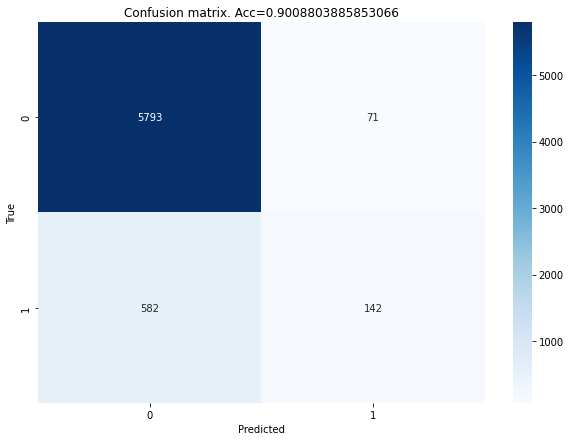

In [ ]:
from sklearn.metrics import confusion_matrix
print_confusion_matrix(confusion_matrix(y_val,lr.predict(X_val_sc)), accuracy_score(y_val,lr.predict(X_val_sc)))

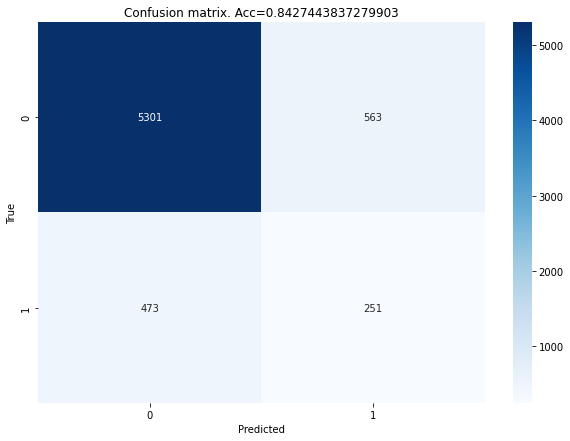

In [ ]:
print_confusion_matrix(confusion_matrix(y_val,dt.predict(X_val_sc)), accuracy_score(y_val,dt.predict(X_val_sc)))

# Optimizando hiperparametros

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

# Grid Search CV usa el método de búsqueda en grilla en un esquema de validación cruzada para encontrar
# los mejores valores de los hiperparámetros

# Definimos una lista con los valores que se va a probar del hiperparametro
class_weight_lst = [None, 'balanced']
C_lst = [10, 1, 0.1, 0.01]


# Un pipeline permite definir cada accion que se va a llevar a cabo en cada fold 
# y así no tener que especificarlos como se hizo anteriormente
# Para ello, se definen pasos, que se representan como duplas
# En general, de los N pasos, los primeros N-1 son transformadores (como escaladores) que deben tener el metodo fit_transform
# El ultimo paso es un clasificador al que se hará un fit/predict
pipe = Pipeline([('scaler', MinMaxScaler()),      # Paso 1: escalar.
                 ('clf', LogisticRegression(solver = 'liblinear'))])  # Paso 2: clasificar

# Definimos la grilla de parametros
param_grid = {
    # El nombre del parametro sigue el patron: <nombre_paso_pipeline>__<nombre_parametros_documentacion>
    'clf__class_weight': class_weight_lst,
    'clf__C': C_lst
}

# Definimos la busqueda y la ejecutamos
grid_clf = GridSearchCV(pipe, param_grid = param_grid,scoring = 'roc_auc')
grid_clf.fit(X_trainval, y_trainval)

GridSearchCV(estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('clf',
                                        LogisticRegression(solver='liblinear'))]),
             param_grid={'clf__C': [10, 1, 0.1, 0.01],
                         'clf__class_weight': [None, 'balanced']},
             scoring='roc_auc')

In [ ]:
# Podemos encontrar los mejores parámetos con best_params_
grid_clf.best_params_

{'clf__C': 10, 'clf__class_weight': 'balanced'}

In [ ]:
# Podemos encontrar el mejor score obtenido con estos parametros
grid_clf.best_score_

0.7703206760001537

# Curvas de aprendizaje

In [ ]:
# Código obtenido de la documentación de sklearn
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : estimator instance
        An estimator instance implementing `fit` and `predict` methods which
        will be cloned for each validation.

    title : str
        Title for the chart.

    X : array-like of shape (n_samples, n_features)
        Training vector, where ``n_samples`` is the number of samples and
        ``n_features`` is the number of features.

    y : array-like of shape (n_samples) or (n_samples, n_features)
        Target relative to ``X`` for classification or regression;
        None for unsupervised learning.

    axes : array-like of shape (3,), default=None
        Axes to use for plotting the curves.

    ylim : tuple of shape (2,), default=None
        Defines minimum and maximum y-values plotted, e.g. (ymin, ymax).

    cv : int, cross-validation generator or an iterable, default=None
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:

          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, default=None
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like of shape (n_ticks,)
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the ``dtype`` is float, it is regarded
        as a fraction of the maximum size of the training set (that is
        determined by the selected validation method), i.e. it has to be within
        (0, 1]. Otherwise it is interpreted as absolute sizes of the training
        sets. Note that for classification the number of samples usually have
        to be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True,
                       scoring = 'roc_auc')
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt

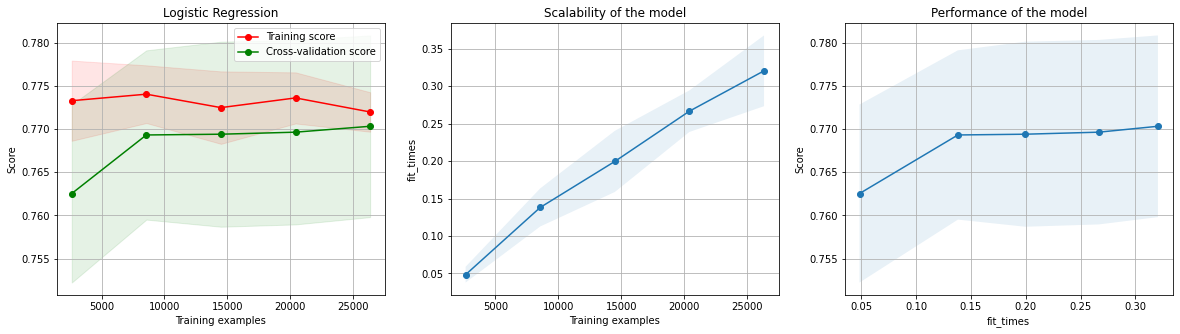

In [ ]:
estimator = Pipeline([('scaler', MinMaxScaler()),
                      ('clf', LogisticRegression(solver = 'liblinear', C=10, class_weight='balanced'))])
plot_learning_curve(estimator, 'Logistic Regression', X_trainval, y_trainval, cv=5, n_jobs=2)
plt.show()

## Se entrena con todo el set de entrenamiento

In [ ]:
# Entrenamos el scaler con toda la data de entrenamiento
scaler = MinMaxScaler()
scaler.fit(X_trainval)
X_trainval_sc = scaler.transform(X_trainval)
X_test_sc = scaler.transform(X_test)

# Entrenamos el clasificador con toda la data de entrenamiento
clf_final = LogisticRegression(solver = 'liblinear', C=10, class_weight = 'balanced')
clf_final.fit(X_trainval_sc, y_trainval)

y_pred = clf_final.predict(X_test_sc)
y_pred_proba = clf_final.predict_proba(X_test_sc)[:,1]

print(f'AUC: {roc_auc_score(y_test, y_pred_proba)}')

AUC: 0.7719888001126664


# Importancia de las variables

Text(0.5, 1.0, 'Importancia de variables para el clasificador')

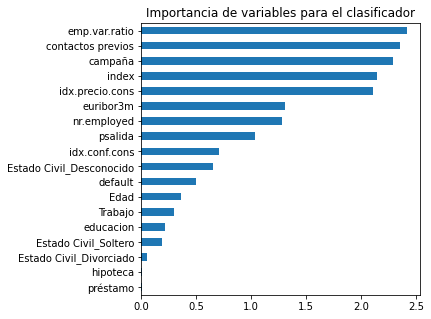

In [ ]:
plt.figure(figsize=(5,5))
# Para metodos lineales, como Regresion Logistica, usamos clf.coef_.
# Otros metodos -como arboles- tienen el atributo feature_importances_
df_importancias = pd.DataFrame.from_dict({x:abs(y) for x,y in zip(X_trainval.columns,clf_final.coef_[0])}, orient='index', columns=['Importancia'])
df_importancias = df_importancias.sort_values(by='Importancia', ascending=True)
df_importancias.Importancia.plot(kind='barh')
plt.title('Importancia de variables para el clasificador')

# Random forest

*Con parametros por defecto*

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier(oob_score = True)
rf.fit(X_train, y_train)

y_pred_train = rf.predict(X_train_sc)
print("Exactitud en entrenamiento (a mano):", np.sum(y_pred_train == y_train) / len(y_train))

y_pred_val = rf.predict(X_val_sc)
print("Exactitud en validación (a mano):", np.sum(y_pred_val == y_val) / len(y_val))

print('Exactitud del modelo inicial en entrenamiento:', rf.score(X_train_sc, y_train))
print('Exactitud del modelo inicial en entrenamiento (Out of Bag):', rf.oob_score_)
print('Exactitud del modelo inicial en validación:', rf.score(X_val_sc, y_val))

Exactitud en entrenamiento (a mano): 0.8936703096539163
Exactitud en validación (a mano): 0.8922282938676381
Exactitud del modelo inicial en entrenamiento: 0.8936703096539163
Exactitud del modelo inicial en entrenamiento (Out of Bag): 0.8917349726775956
Exactitud del modelo inicial en validación: 0.8922282938676381


In [ ]:
from pprint import pprint

n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 8, 10, 12, None]  # 'auto' equivale a 'sqrt'; None equivale a todas las 15
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)] + [None]
min_samples_leaf = [1, 2, 4]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_leaf': min_samples_leaf}

print('Los valores a probar en la búsqueda aleatoria son:')
pprint(random_grid)

print()
print('Si se probara todas las combinaciones se requeriría entrenar', 
      len(random_grid['n_estimators']) *
      len(random_grid['max_features']) *
      len(random_grid['max_depth']) *
      len(random_grid['min_samples_leaf']),
      'modelos'
      )

Los valores a probar en la búsqueda aleatoria son:
{'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 8, 10, 12, None],
 'min_samples_leaf': [1, 2, 4],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

Si se probara todas las combinaciones se requeriría entrenar 1800 modelos


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestClassifier(oob_score=True)
rf_random = RandomizedSearchCV(estimator = rf, 
                               param_distributions = random_grid, 
                               n_iter = 2, 
                               cv = 3,          # Validación cruzada 3-fold
                               verbose=1, 
                               random_state=0, 
                               n_jobs = -1      # Paralelizar en todos los cores disponibles
                               )
rf_random.fit(X_train_sc, y_train)

Fitting 3 folds for each of 2 candidates, totalling 6 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(oob_score=True),
                   n_iter=2, n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 8, 10, 12,
                                                         None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=0, verbose=1)

In [ ]:
rf_random_best = rf_random.best_estimator_

print('Los hiperparámetros del mejor modelo son:')
pprint(rf_random.best_params_)
print()

print('Exactitud luego de búsqueda aleatoria en entrenamiento:', rf_random_best.score(X_train_sc, y_train))
print('Exactitud luego de búsqueda aleatoria en entrenamiento (Out of Bag):', rf_random_best.oob_score_)
print('Exactitud luego de búsqueda aleatoria en validación:', rf_random_best.score(X_val_sc, y_val))

Los hiperparámetros del mejor modelo son:
{'max_depth': 50,
 'max_features': 10,
 'min_samples_leaf': 4,
 'n_estimators': 1000}

Exactitud luego de búsqueda aleatoria en entrenamiento: 0.9375758955676988
Exactitud luego de búsqueda aleatoria en entrenamiento (Out of Bag): 0.8973512446873103
Exactitud luego de búsqueda aleatoria en validación: 0.8986035215543412


In [ ]:
max_features = [9, 10, 11]
max_depth = [57, 60, 63]
min_samples_leaf = [4]
n_estimators = [1200]

segundo_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_leaf': min_samples_leaf}

print('Los valores a probar en la búsqueda por grilla son:')
pprint(segundo_grid)

Los valores a probar en la búsqueda por grilla son:
{'max_depth': [57, 60, 63],
 'max_features': [9, 10, 11],
 'min_samples_leaf': [4],
 'n_estimators': [1200]}


In [ ]:
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier(oob_score = True)
rf_grid = GridSearchCV(estimator = rf, 
                        param_grid = segundo_grid, 
                        cv = 3,          # Validación cruzada 3-fold
                        verbose=2, 
                        n_jobs = -1      # Paralelizar en todos los cores disponibles
                        )
rf_grid.fit(X_train_sc, y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(oob_score=True), n_jobs=-1,
             param_grid={'max_depth': [57, 60, 63], 'max_features': [9, 10, 11],
                         'min_samples_leaf': [4], 'n_estimators': [1200]},
             verbose=2)

In [ ]:
rf_grid_best = rf_grid.best_estimator_

print('Los hiperparámetros del mejor modelo son:')
pprint(rf_grid.best_params_)
print()

print('Exactitud luego de búsqueda en grilla en entrenamiento:', rf_grid_best.score(X_train_sc, y_train))
print('Exactitud luego de búsqueda en grilla en entrenamiento (Out of Bag):', rf_grid_best.oob_score_)
print('Exactitud luego de búsqueda en grilla en validación:', rf_grid_best.score(X_val_sc, y_val))

Los hiperparámetros del mejor modelo son:
{'max_depth': 57,
 'max_features': 9,
 'min_samples_leaf': 4,
 'n_estimators': 1200}

Exactitud luego de búsqueda en grilla en entrenamiento: 0.9365513054037644
Exactitud luego de búsqueda en grilla en entrenamiento (Out of Bag): 0.8967440801457195
Exactitud luego de búsqueda en grilla en validación: 0.8982999392835458


# 1. Modelos de clasificacion ( modelos base)

In [ ]:
from sklearn.metrics import recall_score, precision_score, f1_score, roc_auc_score, plot_roc_curve, plot_confusion_matrix, plot_precision_recall_curve

resultados = {}

def update_resultados(descripcion, model, resultados, X_train, X_test, y_train, y_test):
  y_train_pred = model.predict(X_train)
  y_train_pred_proba = model.predict_proba(X_train)[:,1]

  y_test_pred = model.predict(X_test)
  y_test_pred_proba = model.predict_proba(X_test)[:,1]

  resultados.update( { descripcion: {
      ('Entrenamiento', 'Exactitud'): model.score(X_train, y_train),
      ('Entrenamiento', 'Precisión'): precision_score(y_train, y_train_pred, zero_division=0),
      ('Entrenamiento', 'Exhaustividad'): recall_score(y_train, y_train_pred),
      ('Entrenamiento', 'F1'): f1_score(y_train, y_train_pred),
      ('Entrenamiento', 'AUC'): roc_auc_score(y_train, y_train_pred_proba),
      ('Pruebas', 'Exactitud'): model.score(X_test, y_test),
      ('Pruebas', 'Precisión'): precision_score(y_test, y_test_pred, zero_division=0),
      ('Pruebas', 'Exhaustividad'): recall_score(y_test, y_test_pred),
      ('Pruebas', 'F1'): f1_score(y_test, y_test_pred),
      ('Pruebas', 'AUC'): roc_auc_score(y_test, y_test_pred_proba)
    } } )
  display(pd.DataFrame.from_dict(resultados, orient='index'))

  fig, axes = plt.subplots(1, 3, figsize=(18, 5))
  fig.suptitle(f'{descripcion} (Conjunto de Pruebas)')
  plot_confusion_matrix(model, X_test, y_test, ax=axes[0], values_format='d')
  plot_roc_curve(model, X_test, y_test, ax=axes[1], name=descripcion)
  plot_precision_recall_curve(model, X_test, y_test, ax=axes[2], name=descripcion)
  return

## 1.1 Logistic Regression

In [ ]:
# Ajustar el modelo de Regresión Logística en el Conjunto de Entrenamiento
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train_sc, y_train)

# Predicción de los resultados con el Conjunto de Testing
y_pred  = classifier.predict(X_val_sc)

# Elaborar una matriz de confusión
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_val, y_pred)
cm

array([[5793,   71],
       [ 582,  142]])

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

print(f'AUC - Logistic Regression: {roc_auc_score(y_val, classifier.predict_proba(X_val_sc)[:,1]):.4f}')
print(f'Accuracy - Logistic Regression: {accuracy_score(y_val, classifier.predict(X_val_sc)):.4f}')
print(f'F1-Score Logistic Regression: {f1_score(y_val,classifier.predict(X_val_sc)):.4f}')
print(f'Precision Logistic Regression:{precision_score(y_val,classifier.predict(X_val_sc)):.4f}')
print(f'Recall Logistic Regression: {recall_score(y_val,classifier.predict(X_val_sc)):.4f}')


AUC - Logistic Regression: 0.7795
Accuracy - Logistic Regression: 0.9009
F1-Score Logistic Regression: 0.3031
Precision Logistic Regression:0.6667
Recall Logistic Regression: 0.1961


Entrenamiento                                              \
                        Exactitud Precisión Exhaustividad        F1       AUC   
Logistic Regression       0.89534  0.610374       0.17205  0.268435  0.764549   

                      Pruebas                                              
                    Exactitud Precisión Exhaustividad        F1       AUC  
Logistic Regression   0.90088  0.666667      0.196133  0.303095  0.779531

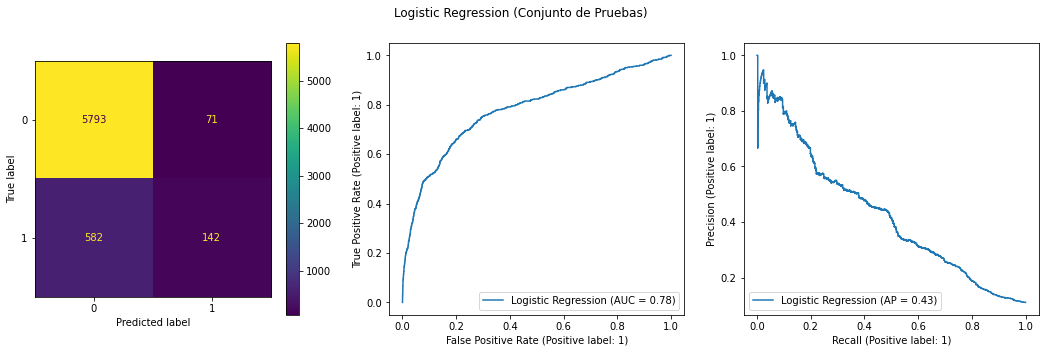

In [ ]:
update_resultados('Logistic Regression', classifier, resultados, X_train_sc, X_val_sc, y_train, y_val)

### GridSearch Logistic Regression

In [ ]:
# Grid search cross validation
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
grid={"C":np.logspace(-4,4,100), "penalty":["l1","l2",'None'],"class_weight":['balanced','None']}# l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(X_train_sc, y_train)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.026560877829466867, 'class_weight': 'None', 'penalty': 'l2'}
accuracy : 0.8971993532838265


## 1.2 K-Nearest Neighbors (K-NN)

In [ ]:
# Ajustar el clasificador en el Conjunto de Entrenamiento
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = "minkowski", p = 2)
classifier.fit(X_train_sc, y_train)

# Predicción de los resultados con el Conjunto de Testing
y_pred  = classifier.predict(X_val_sc)

# Elaborar una matriz de confusión
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_val, y_pred)
cm


array([[5684,  180],
       [ 547,  177]])

In [ ]:
print(f'AUC - K-Nearest Neighbors: {roc_auc_score(y_val, classifier.predict_proba(X_val_sc)[:,1]):.4f}')
print(f'Accuracy - K-Nearest Neighbors: {accuracy_score(y_val, classifier.predict(X_val_sc)):.4f}')
print(f'F1-Score K-Nearest Neighbors: {f1_score(y_val,classifier.predict(X_val_sc)):.4f}')
print(f'Precision K-Nearest Neighbors:{precision_score(y_val,classifier.predict(X_val_sc)):.4f}')
print(f'Recall K-Nearest Neighbors: {recall_score(y_val,classifier.predict(X_val_sc)):.4f}')

AUC - K-Nearest Neighbors: 0.7199
Accuracy - K-Nearest Neighbors: 0.8896
F1-Score K-Nearest Neighbors: 0.3275
Precision K-Nearest Neighbors:0.4958
Recall K-Nearest Neighbors: 0.2445


Entrenamiento                                              \
                        Exactitud Precisión Exhaustividad        F1       AUC   
Logistic Regression      0.895340  0.610374      0.172050  0.268435  0.764549   
K-Nearest Neighbors      0.913441  0.719124      0.368242  0.487070  0.925317   

                      Pruebas                                              
                    Exactitud Precisión Exhaustividad        F1       AUC  
Logistic Regression  0.900880  0.666667      0.196133  0.303095  0.779531  
K-Nearest Neighbors  0.889648  0.495798      0.244475  0.327475  0.719875

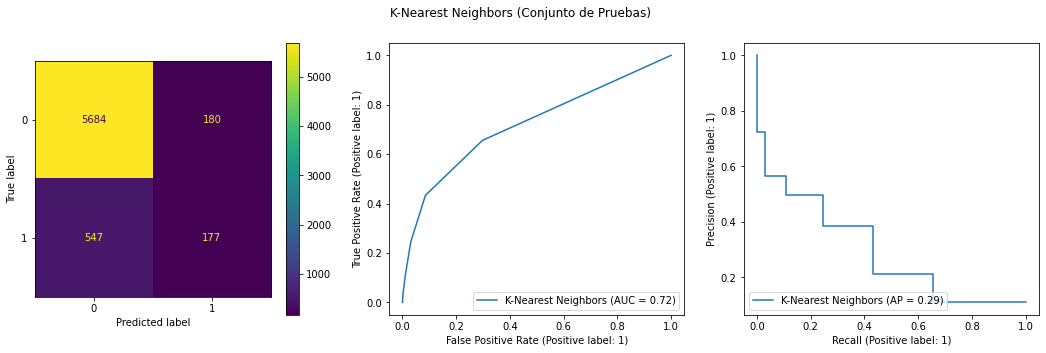

In [ ]:
update_resultados('K-Nearest Neighbors', classifier, resultados, X_train_sc, X_val_sc, y_train, y_val)

## 1.3 Support Vector Machine (SVM)

In [ ]:
# Ajustar el SVM en el Conjunto de Entrenamiento
from sklearn.svm import SVC
classifier = SVC(kernel = "linear", random_state = 0)
classifier.fit(X_train_sc, y_train)


# Predicción de los resultados con el Conjunto de Testing
y_pred  = classifier.predict(X_val_sc)

# Elaborar una matriz de confusión
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_val, y_pred)
cm

array([[5864,    0],
       [ 724,    0]])

In [ ]:
print(f'AUC - Support Vector Machine: {roc_auc_score(y_val, classifier.predict(X_val_sc)):.4f}')
print(f'Accuracy - Support Vector Machine: {accuracy_score(y_val, classifier.predict(X_val_sc)):.4f}')
print(f'F1-Score Support Vector Machine: {f1_score(y_val,classifier.predict(X_val_sc)):.4f}')
print(f'Precision Support Vector Machine:{precision_score(y_val,classifier.predict(X_val_sc)):.4f}')
print(f'Recall Support Vector Machine: {recall_score(y_val,classifier.predict(X_val_sc)):.4f}')

AUC - Support Vector Machine: 0.5000
Accuracy - Support Vector Machine: 0.8901
F1-Score Support Vector Machine: 0.0000
Precision Support Vector Machine:0.0000
Recall Support Vector Machine: 0.0000


## 1.4 Naive Bayes

In [ ]:
# Ajustar el clasificador en el Conjunto de Entrenamiento
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train_sc, y_train)

# Predicción de los resultados con el Conjunto de Testing
y_pred  = classifier.predict(X_val_sc)

# Elaborar una matriz de confusión
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_val, y_pred)
cm

array([[4829, 1035],
       [ 275,  449]])

In [ ]:
print(f'AUC - Naive Bayes: {roc_auc_score(y_val, classifier.predict(X_val_sc)):.4f}')
print(f'Accuracy - Naive Bayes: {accuracy_score(y_val, classifier.predict(X_val_sc)):.4f}')
print(f'F1-Score Naive Bayes: {f1_score(y_val,classifier.predict(X_val_sc)):.4f}')
print(f'Precision Naive Bayes:{precision_score(y_val,classifier.predict(X_val_sc)):.4f}')
print(f'Recall Naive Bayes: {recall_score(y_val,classifier.predict(X_val_sc)):.4f}')

AUC - Naive Bayes: 0.7218
Accuracy - Naive Bayes: 0.8012
F1-Score Naive Bayes: 0.4067
Precision Naive Bayes:0.3026
Recall Naive Bayes: 0.6202


Entrenamiento                                              \
                        Exactitud Precisión Exhaustividad        F1       AUC   
Logistic Regression      0.895340  0.610374      0.172050  0.268435  0.764549   
K-Nearest Neighbors      0.913441  0.719124      0.368242  0.487070  0.925317   
Naive Bayes              0.802102  0.304033      0.599796  0.403523  0.758766   

                      Pruebas                                              
                    Exactitud Precisión Exhaustividad        F1       AUC  
Logistic Regression  0.900880  0.666667      0.196133  0.303095  0.779531  
K-Nearest Neighbors  0.889648  0.495798      0.244475  0.327475  0.719875  
Naive Bayes          0.801154  0.302561      0.620166  0.406703  0.777707

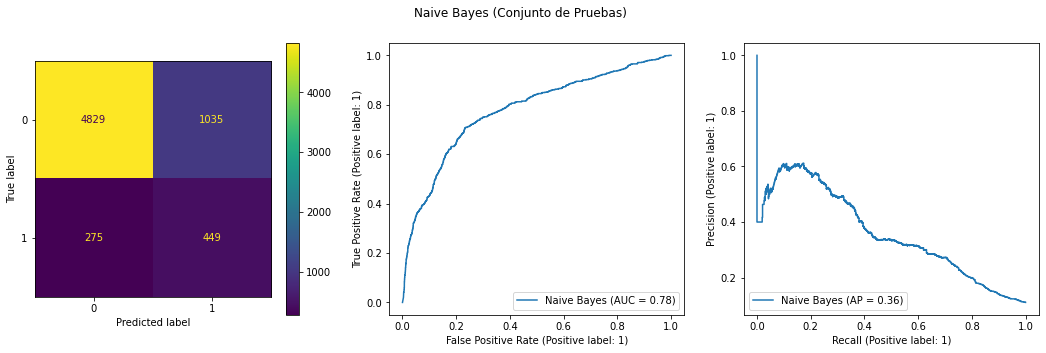

In [ ]:
update_resultados('Naive Bayes', classifier, resultados, X_train_sc, X_val_sc, y_train, y_val)

## 1.5  Decision Tree Classification

In [ ]:
# Ajustar el clasificador de Árbol de Decisión en el Conjunto de Entrenamiento
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = "entropy", random_state = 0)
classifier.fit(X_train_sc, y_train)

# Predicción de los resultados con el Conjunto de Testing
y_pred  = classifier.predict(X_val_sc)

# Elaborar una matriz de confusión
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_val, y_pred)
print(f'AUC - Decision Tree Classification: {roc_auc_score(y_val, classifier.predict(X_val_sc)):.4f}')
print(f'Accuracy - Decision Tree Classification: {accuracy_score(y_val, classifier.predict(X_val_sc)):.4f}')
print(f'F1-Score Decision Tree Classifications: {f1_score(y_val,classifier.predict(X_val_sc)):.4f}')
print(f'Precision Decision Tree Classification:{precision_score(y_val,classifier.predict(X_val_sc)):.4f}')
print(f'Recall Decision Tree Classification: {recall_score(y_val,classifier.predict(X_val_sc)):.4f}')

AUC - Decision Tree Classification: 0.6158
Accuracy - Decision Tree Classification: 0.8441
F1-Score Decision Tree Classifications: 0.3130
Precision Decision Tree Classification:0.3035
Recall Decision Tree Classification: 0.3232


Entrenamiento                                    \
                                 Exactitud Precisión Exhaustividad        F1   
Logistic Regression               0.895340  0.610374      0.172050  0.268435   
K-Nearest Neighbors               0.913441  0.719124      0.368242  0.487070   
Naive Bayes                       0.802102  0.304033      0.599796  0.403523   
Decision Tree Classification      1.000000  1.000000      1.000000  1.000000   

                                         Pruebas                          \
                                   AUC Exactitud Precisión Exhaustividad   
Logistic Regression           0.764549  0.900880  0.666667      0.196133   
K-Nearest Neighbors           0.925317  0.889648  0.495798      0.244475   
Naive Bayes                   0.758766  0.801154  0.302561      0.620166   
Decision Tree Classification  1.000000  0.844111  0.303502      0.323204   

                                                  
                                    F1       AUC  
Logistic Regression           0.303095  0.779531  
K-Nearest Neighbors           0.327475  0.719875  
Naive Bayes                   0.406703  0.777707  
Decision Tree Classification  0.313043  0.615814

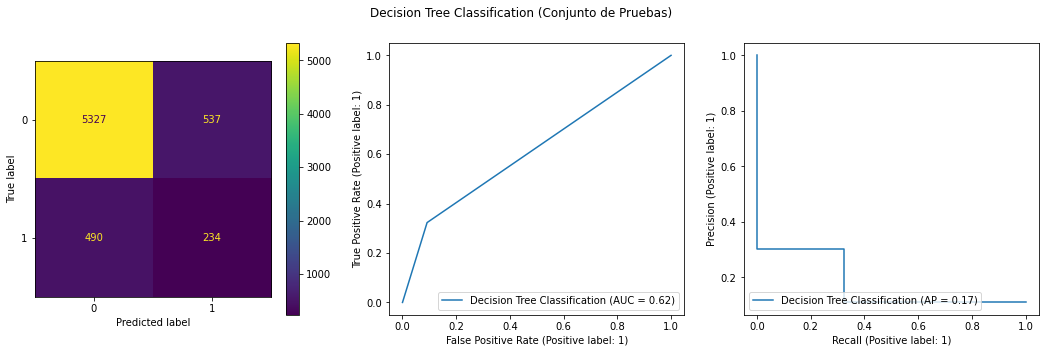

In [ ]:
update_resultados('Decision Tree Classification', classifier, resultados, X_train_sc, X_val_sc, y_train, y_val)

## 1.6 Random Forest Classification

In [ ]:
# Ajustar el clasificador  Random Forest en el Conjunto de Entrenamiento
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 1500, criterion = "entropy", random_state = 0)
classifier.fit(X_train_sc, y_train)

# Predicción de los resultados con el Conjunto de Testing
y_pred  = classifier.predict(X_val_sc)

# Elaborar una matriz de confusión
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_val, y_pred)
print(f'AUC - Random Forest Classification: {roc_auc_score(y_val, classifier.predict(X_val_sc)):.4f}')
print(f'Accuracy - Random Forest Classification: {accuracy_score(y_val, classifier.predict(X_val_sc)):.4f}')
print(f'F1-Score Random Forest Classification: {f1_score(y_val,classifier.predict(X_val_sc)):.4f}')
print(f'Precision Random Forest Classification:{precision_score(y_val,classifier.predict(X_val_sc)):.4f}')
print(f'Recall Random Forest Classification: {recall_score(y_val,classifier.predict(X_val_sc)):.4f}')

AUC - Random Forest Classification: 0.6305
Accuracy - Random Forest Classification: 0.8962
F1-Score Random Forest Classification: 0.3804
Precision Random Forest Classification:0.5526
Recall Random Forest Classification: 0.2901


Entrenamiento                                    \
                                 Exactitud Precisión Exhaustividad        F1   
Logistic Regression               0.895340  0.610374      0.172050  0.268435   
K-Nearest Neighbors               0.913441  0.719124      0.368242  0.487070   
Naive Bayes                       0.802102  0.304033      0.599796  0.403523   
Decision Tree Classification      1.000000  1.000000      1.000000  1.000000   
Random Forest Classification      1.000000  1.000000      1.000000  1.000000   

                                         Pruebas                          \
                                   AUC Exactitud Precisión Exhaustividad   
Logistic Regression           0.764549  0.900880  0.666667      0.196133   
K-Nearest Neighbors           0.925317  0.889648  0.495798      0.244475   
Naive Bayes                   0.758766  0.801154  0.302561      0.620166   
Decision Tree Classification  1.000000  0.844111  0.303502      0.323204   
Random Forest Classification  1.000000  0.896175  0.552632      0.290055   

                                                  
                                    F1       AUC  
Logistic Regression           0.303095  0.779531  
K-Nearest Neighbors           0.327475  0.719875  
Naive Bayes                   0.406703  0.777707  
Decision Tree Classification  0.313043  0.615814  
Random Forest Classification  0.380435  0.789229

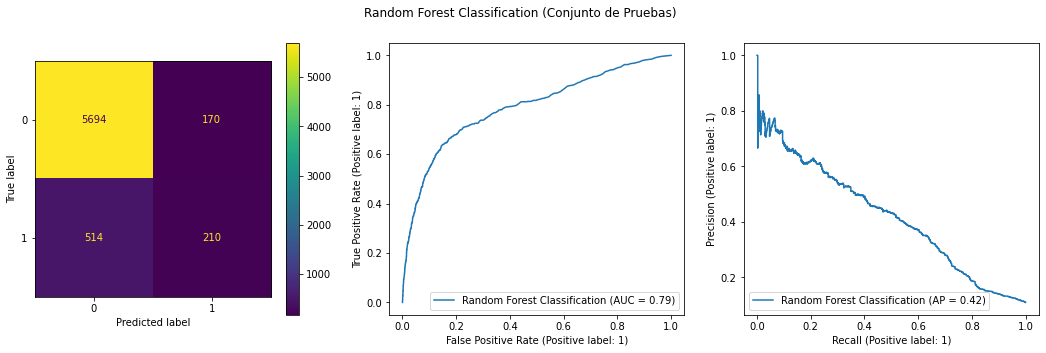

In [ ]:
update_resultados('Random Forest Classification', classifier, resultados, X_train_sc, X_val_sc, y_train, y_val)

## 1.7 LightGBM Classifier

In [ ]:
# build the lightgbm model
import lightgbm as lgb
classifier = lgb.LGBMClassifier()
classifier.fit(X_train_sc, y_train)

# Predicción de los resultados con el Conjunto de Testing
y_pred  = classifier.predict(X_val_sc)
print(f'AUC -LightGBM Classifier: {roc_auc_score(y_val, classifier.predict(X_val_sc)):.4f}')
print(f'Accuracy - LightGBM Classifier: {accuracy_score(y_val, classifier.predict(X_val_sc)):.4f}')
print(f'F1-Score LightGBM Classifier: {f1_score(y_val,classifier.predict(X_val_sc)):.4f}')
print(f'Precision LightGBM Classifier:{precision_score(y_val,classifier.predict(X_val_sc)):.4f}')
print(f'Recall LightGBM Classifier: {recall_score(y_val,classifier.predict(X_val_sc)):.4f}')



AUC -LightGBM Classifier: 0.6022
Accuracy - LightGBM Classifier: 0.9029
F1-Score LightGBM Classifier: 0.3291
Precision LightGBM Classifier:0.6826
Recall LightGBM Classifier: 0.2169


Entrenamiento                                    \
                                 Exactitud Precisión Exhaustividad        F1   
Logistic Regression               0.895340  0.610374      0.172050  0.268435   
K-Nearest Neighbors               0.913441  0.719124      0.368242  0.487070   
Naive Bayes                       0.802102  0.304033      0.599796  0.403523   
Decision Tree Classification      1.000000  1.000000      1.000000  1.000000   
Random Forest Classification      1.000000  1.000000      1.000000  1.000000   
LightGBM Classifier               0.909760  0.771981      0.271676  0.401911   

                                         Pruebas                          \
                                   AUC Exactitud Precisión Exhaustividad   
Logistic Regression           0.764549  0.900880  0.666667      0.196133   
K-Nearest Neighbors           0.925317  0.889648  0.495798      0.244475   
Naive Bayes                   0.758766  0.801154  0.302561      0.620166   
Decision Tree Classification  1.000000  0.844111  0.303502      0.323204   
Random Forest Classification  1.000000  0.896175  0.552632      0.290055   
LightGBM Classifier           0.890626  0.902854  0.682609      0.216851   

                                                  
                                    F1       AUC  
Logistic Regression           0.303095  0.779531  
K-Nearest Neighbors           0.327475  0.719875  
Naive Bayes                   0.406703  0.777707  
Decision Tree Classification  0.313043  0.615814  
Random Forest Classification  0.380435  0.789229  
LightGBM Classifier           0.329140  0.806732

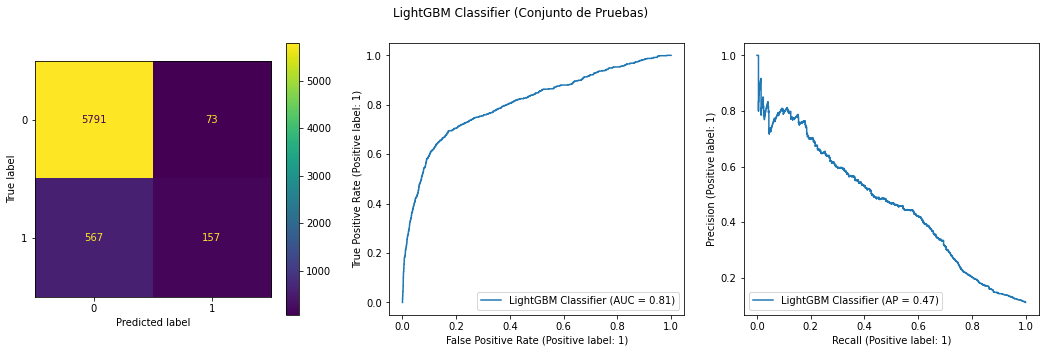

In [ ]:
update_resultados('LightGBM Classifier', classifier, resultados, X_train_sc, X_val_sc, y_train, y_val)

## 1.8 XGBoost for Classification

In [ ]:
import xgboost as xgb
classifier = xgb.XGBClassifier()
classifier.fit(X_train_sc, y_train)

# Predicción de los resultados con el Conjunto de Testing
y_pred  = classifier.predict(X_val_sc)
print(f'AUC -XGBoost: {roc_auc_score(y_val, classifier.predict(X_val_sc)):.4f}')
print(f'Accuracy - XGBoost: {accuracy_score(y_val, classifier.predict(X_val_sc)):.4f}')
print(f'F1-Score XGBoost: {f1_score(y_val,classifier.predict(X_val_sc)):.4f}')
print(f'Precision XGBoost:{precision_score(y_val,classifier.predict(X_val_sc)):.4f}')
print(f'Recall XGBoost: {recall_score(y_val,classifier.predict(X_val_sc)):.4f}')


AUC -XGBoost: 0.5917
Accuracy - XGBoost: 0.9024
F1-Score XGBoost: 0.3034
Precision XGBoost:0.7035
Recall XGBoost: 0.1934


Entrenamiento                                    \
                                 Exactitud Precisión Exhaustividad        F1   
Logistic Regression               0.895340  0.610374      0.172050  0.268435   
K-Nearest Neighbors               0.913441  0.719124      0.368242  0.487070   
Naive Bayes                       0.802102  0.304033      0.599796  0.403523   
Decision Tree Classification      1.000000  1.000000      1.000000  1.000000   
Random Forest Classification      1.000000  1.000000      1.000000  1.000000   
LightGBM Classifier               0.909760  0.771981      0.271676  0.401911   
XGBoost                           0.902436  0.719194      0.206392  0.320740   

                                         Pruebas                          \
                                   AUC Exactitud Precisión Exhaustividad   
Logistic Regression           0.764549  0.900880  0.666667      0.196133   
K-Nearest Neighbors           0.925317  0.889648  0.495798      0.244475   
Naive Bayes                   0.758766  0.801154  0.302561      0.620166   
Decision Tree Classification  1.000000  0.844111  0.303502      0.323204   
Random Forest Classification  1.000000  0.896175  0.552632      0.290055   
LightGBM Classifier           0.890626  0.902854  0.682609      0.216851   
XGBoost                       0.815956  0.902398  0.703518      0.193370   

                                                  
                                    F1       AUC  
Logistic Regression           0.303095  0.779531  
K-Nearest Neighbors           0.327475  0.719875  
Naive Bayes                   0.406703  0.777707  
Decision Tree Classification  0.313043  0.615814  
Random Forest Classification  0.380435  0.789229  
LightGBM Classifier           0.329140  0.806732  
XGBoost                       0.303359  0.812170

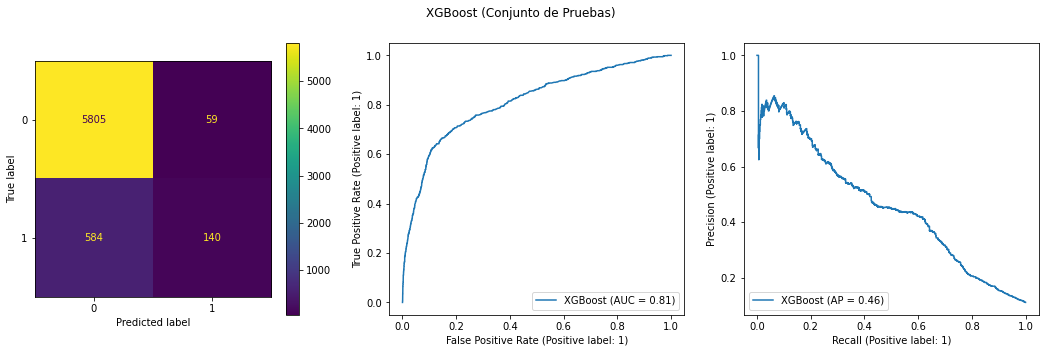

In [ ]:
update_resultados('XGBoost', classifier, resultados, X_train_sc, X_val_sc, y_train, y_val)

## 1.9 CatBoostClassifier

In [ ]:
!pip install catboost
!pip install scikit-learn
!pip install ipywidgets
!jupyter nbextension enable --py widgetsnbextension

     |████████████████████████████████| 76.6 MB 1.2 MB/s 
Enabling notebook extension jupyter-js-widgets/extension...
Paths used for configuration of notebook: 
    	/root/.jupyter/nbconfig/notebook.json
      - Validating: OK
Paths used for configuration of notebook: 
    	/root/.jupyter/nbconfig/notebook.json


In [ ]:
from catboost import CatBoostClassifier
classifier = CatBoostClassifier(
    iterations=100,
    verbose=0,
)

classifier.fit(
    X_train_sc, y_train,
    eval_set=(X_val_sc, y_val))
# Predicción de los resultados con el Conjunto de Testing
y_pred  = classifier.predict(X_val_sc)
print(f'AUC -CatBoost: {roc_auc_score(y_val, classifier.predict(X_val_sc)):.4f}')
print(f'Accuracy - CatBoost: {accuracy_score(y_val, classifier.predict(X_val_sc)):.4f}')
print(f'F1-Score CatBoost: {f1_score(y_val,classifier.predict(X_val_sc)):.4f}')
print(f'Precision CatBoost:{precision_score(y_val,classifier.predict(X_val_sc)):.4f}')
print(f'Recall CatBoost: {recall_score(y_val,classifier.predict(X_val_sc)):.4f}')


AUC -CatBoost: 0.5996
Accuracy - CatBoost: 0.9026
F1-Score CatBoost: 0.3228
Precision CatBoost:0.6830
Recall CatBoost: 0.2113


Entrenamiento                                    \
                                 Exactitud Precisión Exhaustividad        F1   
Logistic Regression               0.895340  0.610374      0.172050  0.268435   
K-Nearest Neighbors               0.913441  0.719124      0.368242  0.487070   
Naive Bayes                       0.802102  0.304033      0.599796  0.403523   
Decision Tree Classification      1.000000  1.000000      1.000000  1.000000   
Random Forest Classification      1.000000  1.000000      1.000000  1.000000   
LightGBM Classifier               0.909760  0.771981      0.271676  0.401911   
XGBoost                           0.902436  0.719194      0.206392  0.320740   
CatBoost                          0.904941  0.727083      0.237334  0.357857   

                                         Pruebas                          \
                                   AUC Exactitud Precisión Exhaustividad   
Logistic Regression           0.764549  0.900880  0.666667      0.196133   
K-Nearest Neighbors           0.925317  0.889648  0.495798      0.244475   
Naive Bayes                   0.758766  0.801154  0.302561      0.620166   
Decision Tree Classification  1.000000  0.844111  0.303502      0.323204   
Random Forest Classification  1.000000  0.896175  0.552632      0.290055   
LightGBM Classifier           0.890626  0.902854  0.682609      0.216851   
XGBoost                       0.815956  0.902398  0.703518      0.193370   
CatBoost                      0.814356  0.902550  0.683036      0.211326   

                                                  
                                    F1       AUC  
Logistic Regression           0.303095  0.779531  
K-Nearest Neighbors           0.327475  0.719875  
Naive Bayes                   0.406703  0.777707  
Decision Tree Classification  0.313043  0.615814  
Random Forest Classification  0.380435  0.789229  
LightGBM Classifier           0.329140  0.806732  
XGBoost                       0.303359  0.812170  
CatBoost                      0.322785  0.815039

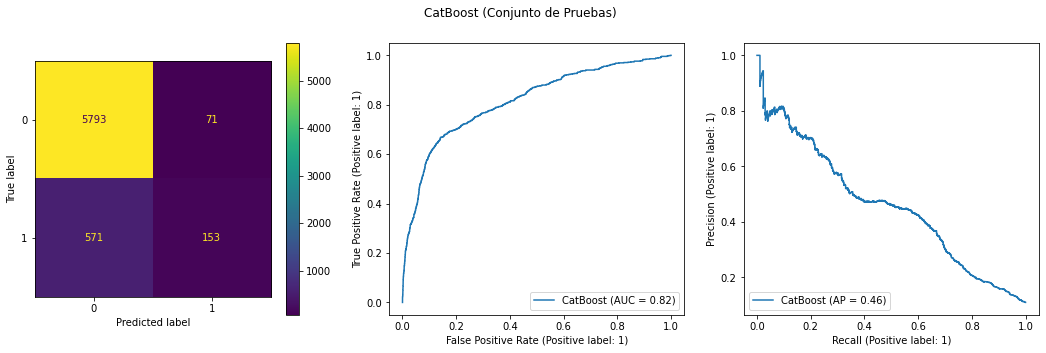

In [ ]:
update_resultados('CatBoost', classifier, resultados, X_train_sc, X_val_sc, y_train, y_val)

## 1.10 AdaBoostClassifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
# Create adaboost classifer object
classifier = AdaBoostClassifier(n_estimators=100,
                         learning_rate=1)
# Train Adaboost Classifer
classifier.fit(X_train_sc, y_train)

#Predict the response for test dataset
y_pred = classifier.predict(X_val_sc)

print(f'AUC -AdaBoostClassifier: {roc_auc_score(y_val, classifier.predict(X_val_sc)):.4f}')
print(f'Accuracy - AdaBoostClassifier: {accuracy_score(y_val, classifier.predict(X_val_sc)):.4f}')
print(f'F1-Score AdaBoostClassifier: {f1_score(y_val,classifier.predict(X_val_sc)):.4f}')
print(f'Precision AdaBoostClassifier:{precision_score(y_val,classifier.predict(X_val_sc)):.4f}')
print(f'Recall AdaBoostClassifier: {recall_score(y_val,classifier.predict(X_val_sc)):.4f}')



AUC -AdaBoostClassifier: 0.5915
Accuracy - AdaBoostClassifier: 0.9010
F1-Score AdaBoostClassifier: 0.3019
Precision AdaBoostClassifier:0.6714
Recall AdaBoostClassifier: 0.1948


Entrenamiento                                    \
                                 Exactitud Precisión Exhaustividad        F1   
Logistic Regression               0.895340  0.610374      0.172050  0.268435   
K-Nearest Neighbors               0.913441  0.719124      0.368242  0.487070   
Naive Bayes                       0.802102  0.304033      0.599796  0.403523   
Decision Tree Classification      1.000000  1.000000      1.000000  1.000000   
Random Forest Classification      1.000000  1.000000      1.000000  1.000000   
LightGBM Classifier               0.909760  0.771981      0.271676  0.401911   
XGBoost                           0.902436  0.719194      0.206392  0.320740   
CatBoost                          0.904941  0.727083      0.237334  0.357857   
AdaBoostClassifier                0.900387  0.682028      0.201292  0.310843   

                                         Pruebas                          \
                                   AUC Exactitud Precisión Exhaustividad   
Logistic Regression           0.764549  0.900880  0.666667      0.196133   
K-Nearest Neighbors           0.925317  0.889648  0.495798      0.244475   
Naive Bayes                   0.758766  0.801154  0.302561      0.620166   
Decision Tree Classification  1.000000  0.844111  0.303502      0.323204   
Random Forest Classification  1.000000  0.896175  0.552632      0.290055   
LightGBM Classifier           0.890626  0.902854  0.682609      0.216851   
XGBoost                       0.815956  0.902398  0.703518      0.193370   
CatBoost                      0.814356  0.902550  0.683036      0.211326   
AdaBoostClassifier            0.803859  0.901032  0.671429      0.194751   

                                                  
                                    F1       AUC  
Logistic Regression           0.303095  0.779531  
K-Nearest Neighbors           0.327475  0.719875  
Naive Bayes                   0.406703  0.777707  
Decision Tree Classification  0.313043  0.615814  
Random Forest Classification  0.380435  0.789229  
LightGBM Classifier           0.329140  0.806732  
XGBoost                       0.303359  0.812170  
CatBoost                      0.322785  0.815039  
AdaBoostClassifier            0.301927  0.809512

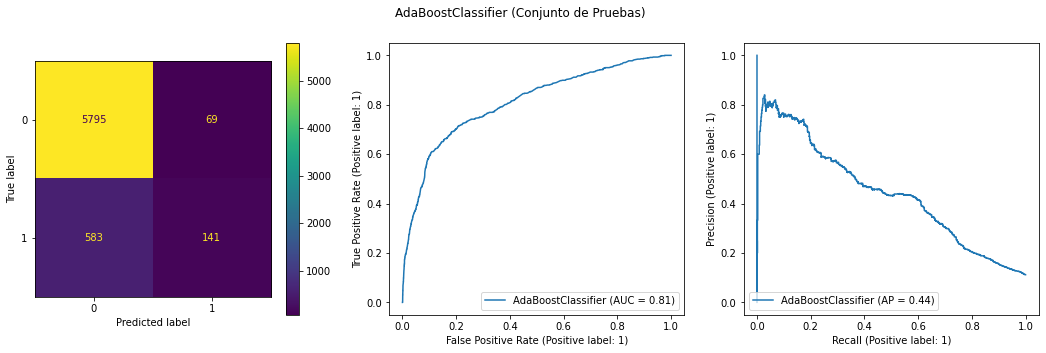

In [ ]:
update_resultados('AdaBoostClassifier', classifier, resultados, X_train_sc, X_val_sc, y_train, y_val)

# Resultados

In [ ]:
import pandas as pd
TablaComparativa = pd.DataFrame(resultados)
TablaComparativa = TablaComparativa.transpose()
TablaComparativa.to_csv('Tabla Comparativa Modelos Machine Learning.csv')